<a href="https://colab.research.google.com/github/vijaygwu/MathematicsOfML/blob/main/Convex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Introduction to Convex Functions

## What is a Convex Function?
A convex function is a continuous function where for any two points, the line segment connecting them lies above or on the graph of the function. Mathematically, for any two points x₁ and x₂, and λ ∈ [0,1]:

f(λx₁ + (1-λ)x₂) ≤ λf(x₁) + (1-λ)f(x₂)

## Key Properties
1. Any local minimum is a global minimum
2. The set of all minima is convex
3. The function is continuous on its domain
4. For twice-differentiable functions, the second derivative is non-negative

## Importance in Machine Learning
Convex functions are crucial in ML because:
1. Optimization algorithms can reliably find global minima
2. Convergence is guaranteed for appropriate learning rates
3. Many important loss functions are convex:
   - Mean Squared Error (MSE)
   - Cross-entropy loss
   - Hinge loss (SVM)
   - Logistic regression loss


```python
import numpy as np
import matplotlib.pyplot as plt

class ConvexityAnalyzer:
    """
    A class to analyze and visualize convex functions.
    
    Key features:
    1. Convexity testing using the mathematical definition
    2. Visualization of convex combinations
    3. Counter-example identification for non-convex functions
    """
    
    def __init__(self, function, x_range=(-5, 5)):
        """
        Initialize the analyzer.
        
        Parameters:
        -----------
        function : callable
            The function to analyze f(x)
        x_range : tuple
            Domain range (min_x, max_x) for analysis
        """
        self.function = function
        self.x_range = x_range
        
    def generate_points(self, num_points=1000):
        """
        Generate points for plotting.
        
        This method creates a smooth representation of the function
        by sampling many points across the domain.
        """
        x = np.linspace(self.x_range[0], self.x_range[1], num_points)
        y = self.function(x)
        return x, y
        
    def check_convexity(self, num_test_points=20):
        """
        Test if a function is convex.
        
        Method:
        1. Sample points across the domain
        2. For each pair of points:
           a. Generate convex combinations
           b. Check if function lies below the convex combination line
        3. Store any violations as counter-examples
        
        Returns:
        --------
        bool : Whether the function appears convex
        list : Counter-examples where convexity is violated
        """
        x = np.linspace(self.x_range[0], self.x_range[1], num_test_points)
        counter_examples = []
        
        for i in range(len(x)):
            for j in range(i + 1, len(x)):
                x1, x2 = x[i], x[j]
                y1, y2 = self.function(x1), self.function(x2)
                
                # Test convexity definition with λ
                lambda_values = np.linspace(0, 1, 100)
                x_convex = lambda_values * x1 + (1 - lambda_values) * x2
                y_convex = lambda_values * y1 + (1 - lambda_values) * y2
                
                # Check for violations
                y_func = self.function(x_convex)
                if np.any(y_func > y_convex + 1e-10):
                    counter_examples.append((x1, x2))
                    
        return len(counter_examples) == 0, counter_examples

    def plot_function_with_convex_combination(self, x1, x2):
        """
        Visualize the function and convex combination.
        
        Creates a plot showing:
        1. The original function
        2. The convex combination line
        3. Points used for the combination
        4. Shaded region between curve and line
        """
        # Generate visualization points
        x, y = self.generate_points()
        
        # Calculate convex combination
        lambda_values = np.linspace(0, 1, 100)
        y1, y2 = self.function(x1), self.function(x2)
        x_convex = lambda_values * x1 + (1 - lambda_values) * x2
        y_convex = lambda_values * y1 + (1 - lambda_values) * y2
        
        # Create visualization
        plt.figure(figsize=(10, 6))
        plt.plot(x, y, 'b-', label='f(x)')
        plt.plot(x_convex, y_convex, 'r--',
                label='λf(x₁) + (1-λ)f(x₂)')
        plt.plot([x1, x2], [y1, y2], 'ro', label='Points')
        
        # Show convexity region
        y_func = self.function(x_convex)
        plt.fill_between(x_convex, y_func, y_convex,
                        alpha=0.2, color='gray',
                        label='Convexity region')
        
        plt.grid(True)
        plt.legend()
        plt.title('Convexity Analysis: f(λx₁ + (1-λ)x₂) ≤ λf(x₁) + (1-λ)f(x₂)')
        plt.show()

# Example Usage
if __name__ == "__main__":
    # Common ML Loss Functions
    
    # 1. Mean Squared Error (MSE)
    def mse_loss(x): return x**2
    mse_analyzer = ConvexityAnalyzer(mse_loss)
    
    # 2. Cross-entropy Loss
    def cross_entropy(x): return -np.log(1 / (1 + np.exp(-x)))
    ce_analyzer = ConvexityAnalyzer(cross_entropy)
    
    # 3. Hinge Loss (SVM)
    def hinge_loss(x): return np.maximum(0, 1 - x)
    hinge_analyzer = ConvexityAnalyzer(hinge_loss)
    
    # Analyze and visualize each loss function
    for name, analyzer in [
        ("MSE Loss", mse_analyzer),
        ("Cross-entropy Loss", ce_analyzer),
        ("Hinge Loss", hinge_analyzer)
    ]:
        print(f"\nAnalyzing {name}:")
        is_convex, counter_examples = analyzer.check_convexity()
        print(f"Is convex? {is_convex}")
        analyzer.plot_function_with_convex_combination(-2, 2)

```

Let's break down the key components and their significance:

1. **Class Structure**
   - `ConvexityAnalyzer`: Main class that encapsulates all functionality
   - Takes a function and domain range as input
   - Provides methods for analysis and visualization

2. **Convexity Testing**
   - Uses the mathematical definition with λ (lambda)
   - Tests multiple pairs of points
   - Identifies counter-examples where convexity is violated

3. **Visualization**
   - Shows the original function
   - Displays convex combinations between points
   - Highlights regions that demonstrate convexity/non-convexity
   - Uses mathematical notation in labels

4. **ML Applications**
   The code includes examples of common ML loss functions:
   - MSE Loss: f(x) = x²
   - Cross-entropy Loss: f(x) = -log(1/(1 + e^(-x)))
   - Hinge Loss: f(x) = max(0, 1-x)

To use this code for analyzing your own functions:
```python
# Define your function
def custom_loss(x): return your_function_here

# Create analyzer
analyzer = ConvexityAnalyzer(custom_loss)

# Test convexity
is_convex, counter_examples = analyzer.check_convexity()

# Visualize
analyzer.plot_function_with_convex_combination(-2, 2)
```



Analyzing MSE Loss:
Is convex? True


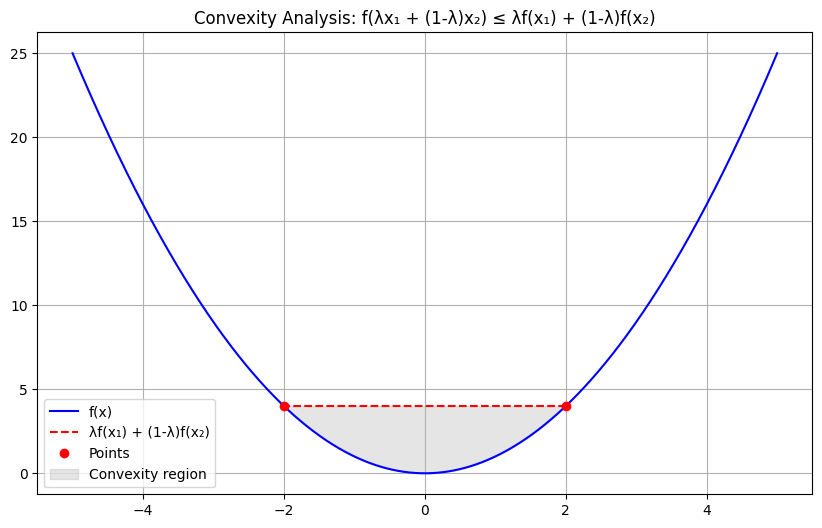


Analyzing Cross-entropy Loss:
Is convex? True


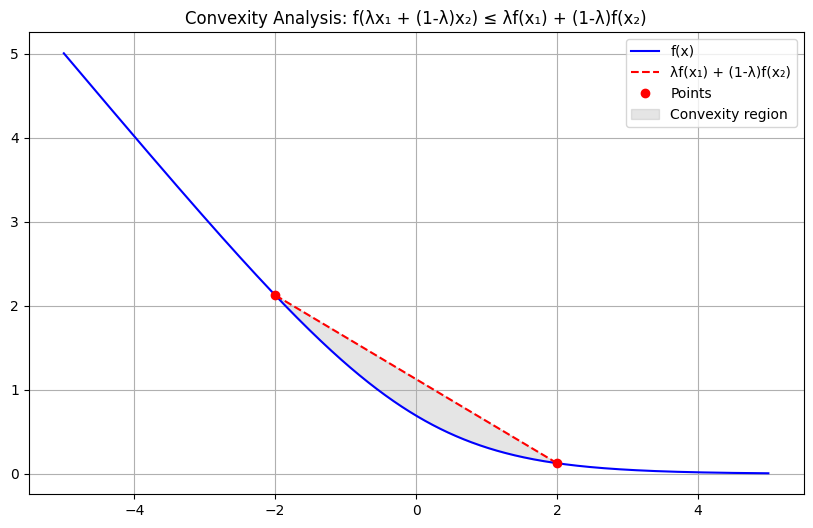


Analyzing Hinge Loss:
Is convex? True


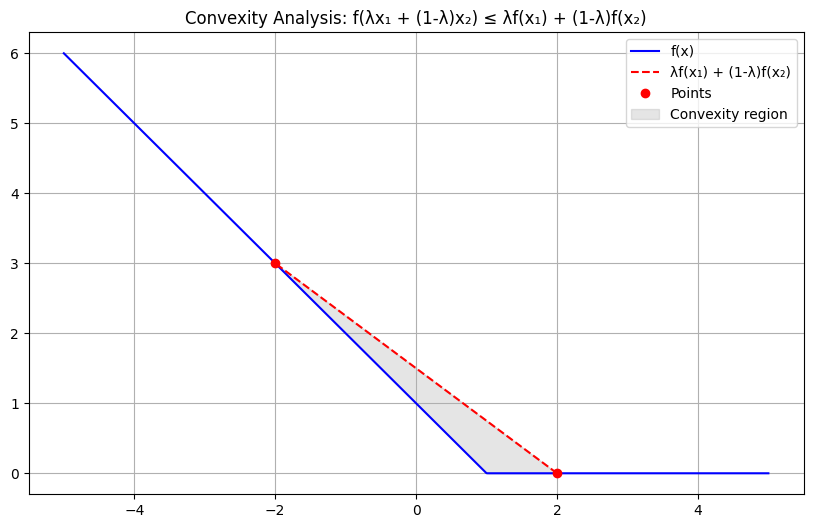

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class ConvexityAnalyzer:
    """
    A class to analyze and visualize convex functions.

    Key features:
    1. Convexity testing using the mathematical definition
    2. Visualization of convex combinations
    3. Counter-example identification for non-convex functions
    """

    def __init__(self, function, x_range=(-5, 5)):
        """
        Initialize the analyzer.

        Parameters:
        -----------
        function : callable
            The function to analyze f(x)
        x_range : tuple
            Domain range (min_x, max_x) for analysis
        """
        self.function = function
        self.x_range = x_range

    def generate_points(self, num_points=1000):
        """
        Generate points for plotting.

        This method creates a smooth representation of the function
        by sampling many points across the domain.
        """
        x = np.linspace(self.x_range[0], self.x_range[1], num_points)
        y = self.function(x)
        return x, y

    def check_convexity(self, num_test_points=20):
        """
        Test if a function is convex.

        Method:
        1. Sample points across the domain
        2. For each pair of points:
           a. Generate convex combinations
           b. Check if function lies below the convex combination line
        3. Store any violations as counter-examples

        Returns:
        --------
        bool : Whether the function appears convex
        list : Counter-examples where convexity is violated
        """
        x = np.linspace(self.x_range[0], self.x_range[1], num_test_points)
        counter_examples = []

        for i in range(len(x)):
            for j in range(i + 1, len(x)):
                x1, x2 = x[i], x[j]
                y1, y2 = self.function(x1), self.function(x2)

                # Test convexity definition with λ
                lambda_values = np.linspace(0, 1, 100)
                x_convex = lambda_values * x1 + (1 - lambda_values) * x2
                y_convex = lambda_values * y1 + (1 - lambda_values) * y2

                # Check for violations
                y_func = self.function(x_convex)
                if np.any(y_func > y_convex + 1e-10):
                    counter_examples.append((x1, x2))

        return len(counter_examples) == 0, counter_examples

    def plot_function_with_convex_combination(self, x1, x2):
        """
        Visualize the function and convex combination.

        Creates a plot showing:
        1. The original function
        2. The convex combination line
        3. Points used for the combination
        4. Shaded region between curve and line
        """
        # Generate visualization points
        x, y = self.generate_points()

        # Calculate convex combination
        lambda_values = np.linspace(0, 1, 100)
        y1, y2 = self.function(x1), self.function(x2)
        x_convex = lambda_values * x1 + (1 - lambda_values) * x2
        y_convex = lambda_values * y1 + (1 - lambda_values) * y2

        # Create visualization
        plt.figure(figsize=(10, 6))
        plt.plot(x, y, 'b-', label='f(x)')
        plt.plot(x_convex, y_convex, 'r--',
                label='λf(x₁) + (1-λ)f(x₂)')
        plt.plot([x1, x2], [y1, y2], 'ro', label='Points')

        # Show convexity region
        y_func = self.function(x_convex)
        plt.fill_between(x_convex, y_func, y_convex,
                        alpha=0.2, color='gray',
                        label='Convexity region')

        plt.grid(True)
        plt.legend()
        plt.title('Convexity Analysis: f(λx₁ + (1-λ)x₂) ≤ λf(x₁) + (1-λ)f(x₂)')
        plt.show()

# Example Usage
if __name__ == "__main__":
    # Common ML Loss Functions

    # 1. Mean Squared Error (MSE)
    def mse_loss(x): return x**2
    mse_analyzer = ConvexityAnalyzer(mse_loss)

    # 2. Cross-entropy Loss
    def cross_entropy(x): return -np.log(1 / (1 + np.exp(-x)))
    ce_analyzer = ConvexityAnalyzer(cross_entropy)

    # 3. Hinge Loss (SVM)
    def hinge_loss(x): return np.maximum(0, 1 - x)
    hinge_analyzer = ConvexityAnalyzer(hinge_loss)

    # Analyze and visualize each loss function
    for name, analyzer in [
        ("MSE Loss", mse_analyzer),
        ("Cross-entropy Loss", ce_analyzer),
        ("Hinge Loss", hinge_analyzer)
    ]:
        print(f"\nAnalyzing {name}:")
        is_convex, counter_examples = analyzer.check_convexity()
        print(f"Is convex? {is_convex}")
        analyzer.plot_function_with_convex_combination(-2, 2)